In [ ]:
# Potato Disease Classification

In [ ]:
Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village
        pic nearby farms and 3rd party pic _ clients

In [ ]:
### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Import data into tensorflow dataset object

### Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:
1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model


sed splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.7 0.1 0.2 -- ./potatoe_disease/picdataset/





In [ ]:
### Set all the Constants

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

### We will use image_dataset_from_directory api to load all images in tensorflow dataset:
tf.keras.utils.image_dataset_from_directory :https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [46]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [47]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [5]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break
#     count=0
#       print(label_batch)
   
#     count+=1
#    if count>2:        

[[[0.7240462  0.71228147 0.73973244]
  [0.72345805 0.71169335 0.7391443 ]
  [0.72287    0.7111053  0.73855627]
  ...
  [0.6905682  0.6827251  0.73370546]
  [0.69264054 0.6847974  0.7357778 ]
  [0.67696524 0.6691221  0.7201025 ]]

 [[0.74327916 0.73151445 0.75896543]
  [0.74254405 0.73077935 0.7582303 ]
  [0.74180895 0.73004425 0.7574952 ]
  ...
  [0.6907152  0.68287206 0.73385245]
  [0.6920524  0.6842093  0.7351897 ]
  [0.6763772  0.66853404 0.7195144 ]]

 [[0.74509805 0.73333335 0.7607844 ]
  [0.74509805 0.73333335 0.7607844 ]
  [0.74509805 0.73333335 0.7607844 ]
  ...
  [0.69086224 0.6830191  0.7339995 ]
  [0.6914643  0.68362117 0.7346016 ]
  [0.67578906 0.6679459  0.7189263 ]]

 ...

 [[0.5101276  0.49836287 0.54150015]
  [0.6030445  0.5912798  0.63441706]
  [0.5620754  0.5503107  0.5934479 ]
  ...
  [0.50371915 0.48803285 0.54293483]
  [0.5022489  0.48656264 0.54146457]
  [0.5007787  0.4850924  0.53999436]]

 [[0.5070401  0.4952754  0.53841263]
  [0.6086314  0.59686667 0.6400039 ]


In [6]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [ ]:
## Building the Model

In [ ]:
### Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. 
Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256).
This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256).
You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. 
At that time somone can supply an image that is not (256,256) and this layer will resize it

In [ ]:
### Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [ ]:
### Model Architecture
We use a CNN coupled with a Softmax activation in the output layer.
We also add the initial layers for resizing, normalization and Data Augmentation.

In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [11]:
1507/32 #nosb images train

47.09375

In [12]:
215/32 #nos images val

6.71875

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 [==============================] - 388s 7s/step - loss: 0.9091 - accuracy: 0.4959 - val_loss: 0.9370 - val_accuracy: 0.6771
Epoch 2/20
47/47 [==============================] - 145s 3s/step - loss: 0.6845 - accuracy: 0.7035 - val_loss: 0.4637 - val_accuracy: 0.7656
Epoch 3/20
47/47 [==============================] - 162s 3s/step - loss: 0.4243 - accuracy: 0.8189 - val_loss: 0.4276 - val_accuracy: 0.8438
Epoch 4/20
47/47 [==============================] - 163s 3s/step - loss: 0.3594 - accuracy: 0.8602 - val_loss: 0.3668 - val_accuracy: 0.7969
Epoch 5/20
47/47 [==============================] - 166s 4s/step - loss: 0.2913 - accuracy: 0.8840 - val_loss: 0.3179 - val_accuracy: 0.8646
Epoch 6/20
47/47 [==============================] - 166s 4s/step - loss: 0.2092 - accuracy: 0.9220 - val_loss: 0.4459 - val_accuracy: 0.8281
Epoch 7/20
47/47 [==============================] - 6091s 132s/step - loss: 0.2499 - accuracy: 0.9057 - val_loss: 0.2902 - val_accuracy: 0.8646
Epoch 8/20

In [14]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 38s 3s/step - loss: 0.0816 - accuracy: 0.9745


In [15]:
scores

[0.0816311314702034, 0.9744779467582703]

#Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [16]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [17]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [19]:
type(history.history['loss'])

list

In [20]:
len(history.history['loss'])

20

In [21]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9090884923934937,
 0.6844990849494934,
 0.42432138323783875,
 0.35941261053085327,
 0.2912920117378235]

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
val_acc

[0.6770833134651184,
 0.765625,
 0.84375,
 0.796875,
 0.8645833134651184,
 0.828125,
 0.8645833134651184,
 0.8541666865348816,
 0.90625,
 0.9479166865348816,
 0.9166666865348816,
 0.9270833134651184,
 0.9322916865348816,
 0.9583333134651184,
 0.96875,
 0.9322916865348816,
 0.9010416865348816,
 0.9270833134651184,
 0.9479166865348816,
 0.984375]

In [24]:
acc

[0.49592944979667664,
 0.7035278081893921,
 0.8188602328300476,
 0.8602442145347595,
 0.883989155292511,
 0.9219809770584106,
 0.9056987762451172,
 0.9219809770584106,
 0.9328358173370361,
 0.9477611780166626,
 0.9497964978218079,
 0.9599728584289551,
 0.9552238583564758,
 0.9681139588356018,
 0.9715061187744141,
 0.972862958908081,
 0.9541223645210266,
 0.9321573972702026,
 0.9701492786407471,
 0.9823608994483948]

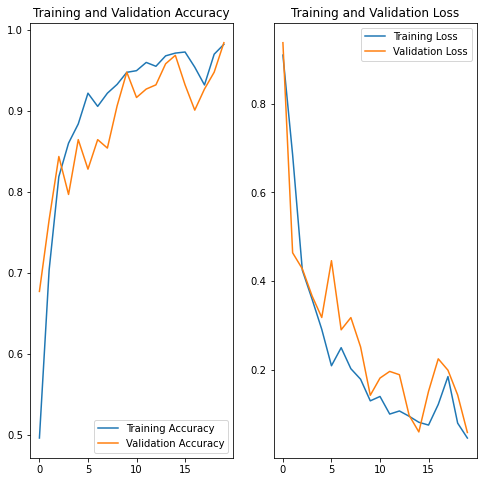

In [25]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Visualize some of the images from our dataset
### Write a function for inference

In [ ]:
import numpy as np

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


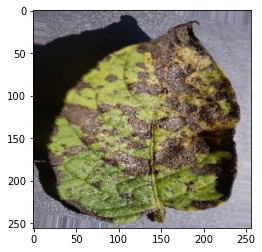

In [50]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:" ,class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [ ]:
### Write a function for inference

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


**Now run inference on few sample images**

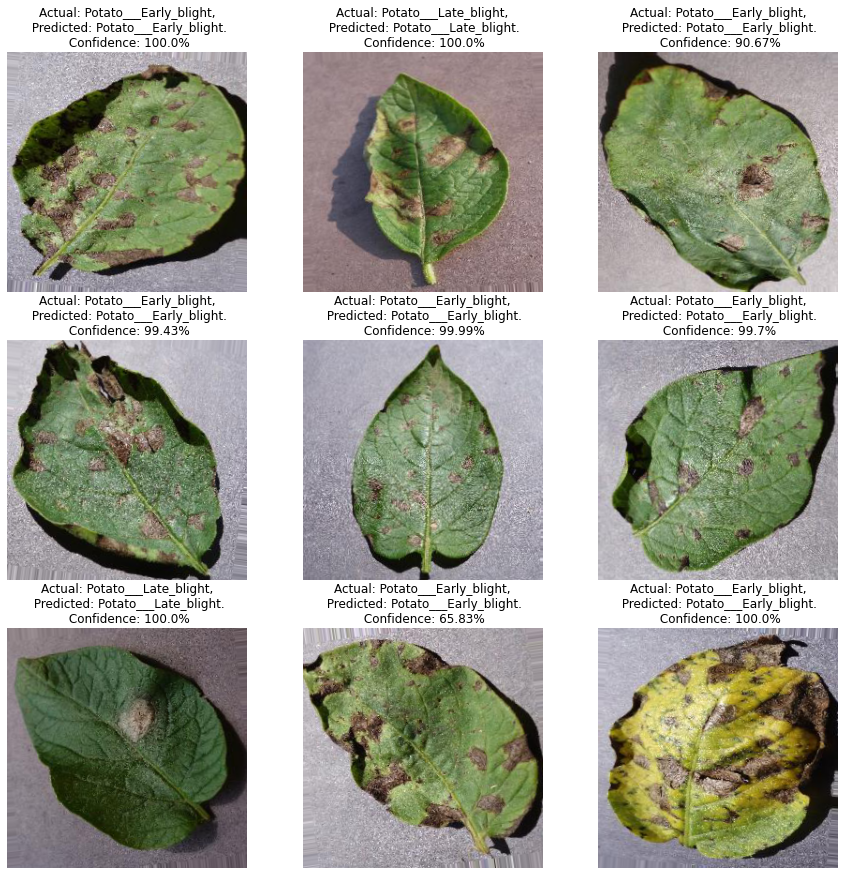

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [54]:
model.save("../potatoes.h5")